# Xarray introduction

First test of xarray, using https://earth-env-data-science.github.io/lectures/xarray/xarray_intro.html with the projects data

In [1]:
import numpy as np
import xarray as xr
import os
from matplotlib import pyplot as plt
%matplotlib inline

path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/HadGEM_driven_COSMO/Files_for_Remapping/for_tom"
os.chdir(path)

First, let's try to visualise the data

In [2]:
data1 = xr.open_dataset("temperature_adjustment_lm_f.nc")
data1

<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 464, time: 1)
Coordinates:
  * longitude  (longitude) float64 -40.38 -40.12 -39.88 ... 74.88 75.12 75.38
  * latitude   (latitude) float64 25.38 25.62 25.88 26.12 ... 74.88 75.12 75.38
  * time       (time) datetime64[ns] 2007-01-16
Data variables:
    T_2M       (time, latitude, longitude) float32 ...
Attributes:
    CDI:             Climate Data Interface version 1.6.3 (http://code.zmaw.d...
    Conventions:     CF-1.0
    history:         Wed Oct 15 16:06:09 2014: ncrename -v HSURF,T_2M tempera...
    source:          cosmo_090213_4.14_clm_10
    institution:     -
    title:           IPCC conf Test
    experiment_id:   Reference
    realization:     1
    conventionsURL:  http://www.unidata.ucar.edu/packages/netcdf/conventions....
    contact:         -
    references:      -
    nccf_version:    2.0
    creation_date:   2014-03-19 18:24:46
    NCO:             4.3.7
    CDO:             Climate Data Operators version 1.6.

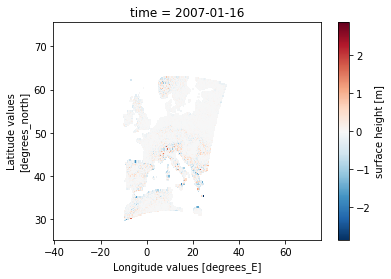

In [3]:
data1.T_2M.plot()

temperature_adjustment_lm_f.nc seems to have only 2007.01.16 data, with i don't know yet informations.
Let's try the other one

In [4]:
data2 = xr.open_dataset("remapweights_lm_f_to_lm_c_con.nc")
data2

<xarray.Dataset>
Dimensions:              (dst_grid_corners: 4, dst_grid_rank: 2, dst_grid_size: 130321, num_links: 3319684, num_wgts: 3, src_grid_corners: 4, src_grid_rank: 2, src_grid_size: 2377764)
Dimensions without coordinates: dst_grid_corners, dst_grid_rank, dst_grid_size, num_links, num_wgts, src_grid_corners, src_grid_rank, src_grid_size
Data variables:
    src_grid_dims        (src_grid_rank) int32 ...
    dst_grid_dims        (dst_grid_rank) int32 ...
    src_grid_center_lat  (src_grid_size) float64 ...
    dst_grid_center_lat  (dst_grid_size) float64 ...
    src_grid_center_lon  (src_grid_size) float64 ...
    dst_grid_center_lon  (dst_grid_size) float64 ...
    src_grid_corner_lat  (src_grid_size, src_grid_corners) float64 ...
    src_grid_corner_lon  (src_grid_size, src_grid_corners) float64 ...
    dst_grid_corner_lat  (dst_grid_size, dst_grid_corners) float64 ...
    dst_grid_corner_lon  (dst_grid_size, dst_grid_corners) float64 ...
    src_grid_imask       (src_grid_si

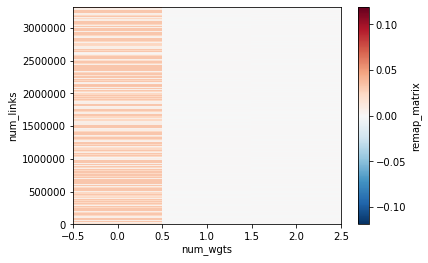

In [5]:
data2.remap_matrix.plot()

Despite trying different data variables, I don't know what this is about

Let's go into another directory with this time the real data. Here we have some topography info :

In [6]:
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/HadGEM_driven_COSMO/Topography"
os.chdir(path)

In [7]:
topo = xr.open_dataset("lffd19981101000000c.nc")
topo

<xarray.Dataset>
Dimensions:       (bnds: 2, level1: 61, rlat: 1542, rlon: 1542, time: 1)
Coordinates:
  * time          (time) datetime64[ns] 1998-12-01
  * rlon          (rlon) float32 -18.86 -18.84 -18.82 ... 11.92 11.94 11.96
  * rlat          (rlat) float32 -14.86 -14.84 -14.82 ... 15.92 15.94 15.96
    lon           (rlat, rlon) float32 ...
    lat           (rlat, rlon) float32 ...
Dimensions without coordinates: bnds, level1
Data variables:
    time_bnds     (time, bnds) datetime64[ns] ...
    rotated_pole  |S1 ...
    vcoord        (level1) float32 ...
    HHL           (time, level1, rlat, rlon) float32 ...
    HSURF         (time, rlat, rlon) float32 ...
    FIS           (time, rlat, rlon) float32 ...
    FC            (time, rlat, rlon) float32 ...
    RLAT          (time, rlat, rlon) float32 ...
    RLON          (time, rlat, rlon) float32 ...
    FR_LAND       (time, rlat, rlon) float32 ...
    SOILTYP       (time, rlat, rlon) float32 ...
    S_ORO         (time, rlat, r

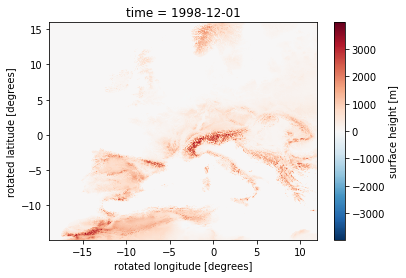

In [25]:
topo.HSURF.plot()

HHL : Smthg depending on the height 

HSURF : Surface height

FIS : Surface geopotential (?)

FC : Coriolis

FR_LAND : Sea or land fraction

SOILTYP : Soil Type (which type?)

FOR_E : Fraction covered by evergreen forest

FOR_D : Same with deciduous forset 

AER_ : Aerosol X

ALB_ : Albedo of X soil

Let's take a look at the present data

In [31]:
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/HadGEM_driven_COSMO/Present/2003"
os.chdir(path)

In [33]:
pres_rand = xr.open_dataset("lffd20030101030000.nc")
pres_rand

<xarray.Dataset>
Dimensions:       (bnds: 2, level1: 61, rlat: 1542, rlon: 1542, soil1: 10, srlat: 1542, srlon: 1542, time: 1)
Coordinates:
  * time          (time) datetime64[ns] 2003-01-01T03:00:00
  * rlon          (rlon) float32 -18.86 -18.84 -18.82 ... 11.92 11.94 11.96
  * rlat          (rlat) float32 -14.86 -14.84 -14.82 ... 15.92 15.94 15.96
  * srlon         (srlon) float32 -18.85 -18.83 -18.81 ... 11.93 11.95 11.97
  * srlat         (srlat) float32 -14.85 -14.83 -14.81 ... 15.93 15.95 15.97
    lon           (rlat, rlon) float32 ...
    lat           (rlat, rlon) float32 ...
    height_2m     float32 ...
    height_10m    float32 ...
  * soil1         (soil1) float32 0.005 0.025 0.07 0.16 ... 1.47 2.86 5.74 11.5
Dimensions without coordinates: bnds, level1
Data variables:
    time_bnds     (time, bnds) datetime64[ns] ...
    rotated_pole  |S1 ...
    slonu         (rlat, srlon) float32 ...
    slatu         (rlat, srlon) float32 ...
    slonv         (srlat, rlon) float32 ...

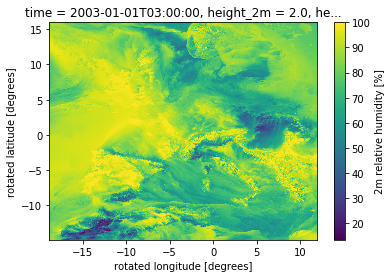

In [40]:
pres_rand.RELHUM_2M.plot()